# E1: Análisis Exploratorio de Datos en Python con Pandas y NumPy

En esta prueba práctica, los estudiantes aplicarán sus conocimientos en Python y herramientas de análisis de datos dentro del entorno Jupyter Notebook. A partir de un dataset ficticio de pacientes, deberán demostrar su capacidad para:
- Configurar el entorno de trabajo en Anaconda y Jupyter Notebook.
- Utilizar Pandas y NumPy para la manipulación y exploración de datos.
- Aplicar operaciones estadísticas básicas para extraer información relevante.
- Generar visualizaciones de datos con Matplotlib.

Este ejercicio tiene como objetivo evaluar la habilidad del estudiante para trabajar con datos en Python, desde su carga y preprocesamiento hasta su análisis y visualización. Se espera que los participantes estructuren su código de manera clara y utilicen buenas prácticas de programación.


#### Configuración del Entorno:

- Verifica que las librerías necesarias (numpy y pandas) estén instaladas en tu entorno. Si no lo están, instálalas usando pip o conda.
- Importa las librerías necesarias (numpy, pandas, matplotlib.pyplot) y muestra sus versiones en el notebook.

In [1]:
#Verifico e importo las librerías.
import numpy as np
import pandas as pd
#Para comprobar la versión.
np.__version__
pd.__version__

'2.2.3'

#### Carga y Exploración de Datos:

- Descarga y carga el archivo datos_pacientes.csv en un DataFrame de Pandas.
- Muestra las primeras 5 filas del dataset.
- Obtén información sobre los tipos de datos y verifica la existencia de valores nulos en el dataset.


In [2]:
#Cargo el archivo en un dataframe:
df = pd.read_csv('datos_pacientes.csv', index_col = ['ID'])
print (df)

#Muestro las 5 primeras filas:
df.head()



FileNotFoundError: [Errno 2] No such file or directory: 'datos_pacientes.csv'

In [ ]:
#Info del tipo de datos:
df.info()
#Nos da información del tipo de datos para cada columna, y si existen valores nulos(en este caso no)

print(df.isnull().sum())




#### Análisis Estadístico con Pandas:

- Muestra un resumen estadístico de las variables numéricas.
- Calcula la edad promedio de los pacientes y el número de pacientes por género.
- Identifica cuántos pacientes tienen una presión arterial superior a 130 mmHg.

In [ ]:
# Muestra un resumen estadístico de las variables numéricas.
df.describe()

In [ ]:
# Calcula la edad promedio de los pacientes  
edad_promedio = df['Edad'].mean()
print(f'La edad promedio es: {edad_promedio}')

# Número de pacientes por género.
conteo_genero = df['Género'].value_counts()
print('Número de pacientes por género:', conteo_genero)

#Otra forma
#femeninos = df['Género'].str.count('F')
#pacientes_femeninos = femeninos.sum()
#pacientes_masculinos = totales - pacientes_femeninos
#print(f'Pacientes femeninos: {pacientes_femeninos}, Pacientes masculinos: {pacientes_masculinos}')



In [3]:
# Identifica cuántos pacientes tienen una presión arterial superior a 130 mmHg.
pacientes_presion_alta = df[df['Presión_Arterial'] > 130]
numero_pacientes = pacientes_presion_alta.shape[0]
print(f'Número de pacientes con presión alta: { numero_pacientes}')

#df[df['Presión_Arterial'] > 130] #Me muestra los datos de los pacientes con presión > 130. Puedo ver que son 555
#df[df['Presión_Arterial'] > 130].count() #Me da el nº de pacientes con presión > 130 (555)


NameError: name 'df' is not defined

#### Manipulación de Datos con NumPy y Pandas:

- Crea una nueva columna llamada IMC (Índice de Masa Corporal, BMI) utilizando la fórmula: 

<img src=https://www.eufic.org/en/media/images/2.2._bmi_img_1_.png width="250">

- Agrega una columna categórica Estado_IMC que clasifique a los pacientes en:
    - Bajo peso (IMC < 18.5)
    - Normal (IMC entre 18.5 y 24.9)
    - Sobrepeso (IMC entre 25 y 29.9)
    - Obesidad (IMC >= 30)
- Muestra la cantidad de pacientes en cada categoría de Estado_IMC.


In [7]:
#Agregar una columna IMC
df['IMC'] = df['Peso'] / ( df['Altura'] * df['Altura'])
df.head()

,Edad,Género,Peso,Altura,Presión_Arterial,IMC
ID,,,,,,
1,71,F,116.4,1.69,143,40.754876
2,34,M,67.7,1.50,127,30.088889
3,80,M,75.1,1.69,137,26.294598
4,40,M,76.6,1.90,116,21.218837
5,43,M,92.4,1.80,109,28.518519


In [8]:
#Agrega una columna categórica Estado_IMC

def clasificar_IMC(imc):
    if imc < 18.5:
       return 'Bajo Peso'
    elif 18.5 <= imc <= 24.9:
        return 'Peso Normal'
    elif 24.9 < imc <= 29.9:
        return 'Sobrepeso'
    else:
        return 'Obesidad'

df['Estado_IMC'] = df['IMC'].apply(clasificar_IMC)
df.head()

    
    

,Edad,Género,Peso,Altura,Presión_Arterial,IMC,Estado_IMC
ID,,,,,,,
1,71,F,116.4,1.69,143,40.754876,Obesidad
2,34,M,67.7,1.50,127,30.088889,Obesidad
3,80,M,75.1,1.69,137,26.294598,Sobrepeso
4,40,M,76.6,1.90,116,21.218837,Peso Normal
5,43,M,92.4,1.80,109,28.518519,Sobrepeso


In [9]:
#Muestra la cantidad de pacientes en cada categoría de Estado_IMC.

# df[df['Estado_IMC']=='Bajo Peso']
conteo_IMC = df['Estado_IMC'].value_counts()
print('Cantidad de pacientes en cada categoría IMC:', conteo_IMC)

Cantidad de pacientes en cada categoría IMC: Estado_IMC
Obesidad       391
Peso Normal    249
Sobrepeso      223
Bajo Peso      137
Name: count, dtype: int64


#### Visualización de Datos:

- Genera un gráfico de barras que muestre la cantidad de pacientes en cada categoría de Estado_IMC.
- Usa matplotlib para personalizar el gráfico con título, etiquetas y colores adecuados.


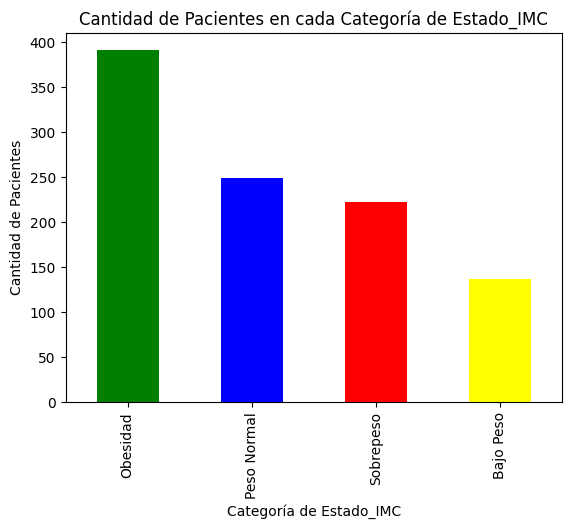

In [11]:
import matplotlib.pyplot as plt

#Genera el grafico de barras con colores personalizados
conteo_IMC.plot(kind = 'bar' , color = ['green','blue', 'red', 'yellow' ])

#Personalizar etiquetas
plt.title('Cantidad de Pacientes en cada Categoría de Estado_IMC') 
plt.xlabel('Categoría de Estado_IMC') 
plt.ylabel('Cantidad de Pacientes')
plt.show()
